In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
match=pd.read_csv("/content/drive/MyDrive/DataScience/Match.csv")

In [3]:
PP=pd.read_csv("/content/drive/MyDrive/DataScience/Player_performance.csv")

In [4]:
match.head()

,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,City,Neutral_venue,Toss_winner,Toss_decision,Player_of_match,Umpire1,Umpire2,Reserve_umpire,Tv_umpire,Match_referee,Winner,Winner_runs,Winner_wickets,Method,Outcome
0,1000887,Australia,Pakistan,male,13-01-2017,2016,Pakistan in Australia ODI Series,1.0,"""Brisbane Cricket Ground",Brisbane,NaN,Australia,bat,MS Wade,MD Martell,C Shamshuddin,SJ Nogajski,CB Gaffaney,JJ Crowe,Australia,92.0,NaN,NaN,NaN
1,1000889,Australia,Pakistan,male,15-01-2017,2016,Pakistan in Australia ODI Series,2.0,Melbourne Cricket Ground,NaN,NaN,Australia,bat,Mohammad Hafeez,CB Gaffaney,P Wilson,SJ Nogajski,C Shamshuddin,JJ Crowe,Pakistan,NaN,6.0,NaN,NaN
2,1000891,Australia,Pakistan,male,19-01-2017,2016,Pakistan in Australia ODI Series,3.0,Western Australia Cricket Association Ground,Perth,NaN,Australia,field,SPD Smith,SD Fry,C Shamshuddin,P Wilson,CB Gaffaney,JJ Crowe,Australia,NaN,7.0,NaN,NaN
3,1000893,Australia,Pakistan,male,22-01-2017,2016,Pakistan in Australia ODI Series,4.0,Sydney Cricket Ground,NaN,NaN,Australia,bat,DA Warner,CB Gaffaney,MD Martell,P Wilson,C Shamshuddin,JJ Crowe,Australia,86.0,NaN,NaN,NaN
4,1000895,Australia,Pakistan,male,26-01-2017,2016,Pakistan in Australia ODI Series,5.0,Adelaide Oval,NaN,NaN,Australia,bat,DA Warner,SD Fry,C Shamshuddin,SJ Nogajski,CB Gaffaney,JJ Crowe,Australia,57.0,NaN,NaN,NaN


## **DATA PREPROCESSING**

Dropping unnecessary columns which wont affect the player prediction and Renaming some columns for ease.

In [5]:
match.drop(['Umpire1','Umpire2','Reserve_umpire','Tv_umpire','Match_referee','Gender','City','Neutral_venue','Method','Outcome','Match_number','Winner_runs','Winner_wickets'],axis=1,inplace=True)
match.rename(columns = {'Series/Competition':'Series'}, inplace = True)


In [6]:
match.head()

,Match_id,Team1,Team2,Date,Season,Series,Venue,Toss_winner,Toss_decision,Player_of_match,Winner
0,1000887,Australia,Pakistan,13-01-2017,2016,Pakistan in Australia ODI Series,"""Brisbane Cricket Ground",Australia,bat,MS Wade,Australia
1,1000889,Australia,Pakistan,15-01-2017,2016,Pakistan in Australia ODI Series,Melbourne Cricket Ground,Australia,bat,Mohammad Hafeez,Pakistan
2,1000891,Australia,Pakistan,19-01-2017,2016,Pakistan in Australia ODI Series,Western Australia Cricket Association Ground,Australia,field,SPD Smith,Australia
3,1000893,Australia,Pakistan,22-01-2017,2016,Pakistan in Australia ODI Series,Sydney Cricket Ground,Australia,bat,DA Warner,Australia
4,1000895,Australia,Pakistan,26-01-2017,2016,Pakistan in Australia ODI Series,Adelaide Oval,Australia,bat,DA Warner,Australia


In [7]:
match.shape

(1951, 11)

In [8]:
match.isnull().sum().sort_values()

Match_id             0
Team1                0
Team2                0
Date                 0
Season               0
Series               0
Venue                0
Toss_winner          0
Toss_decision        0
Winner              69
Player_of_match    142
dtype: int64

### HANDLING MISSING VALUES IN **WINNER** COLOUMN

In [9]:
match['Winner'] = match['Winner'].fillna("Draw")

In [10]:
match.isnull().sum().sort_values(ascending = False)

Player_of_match    142
Winner               0
Toss_decision        0
Toss_winner          0
Venue                0
Series               0
Season               0
Date                 0
Team2                0
Team1                0
Match_id             0
dtype: int64

All the null values in Winner column is now filled with Draw. 'Draw' is chosen as putting any random team which is not in the series can cause ambiguity in tha data.

### HANDLING MISSING VALUES IN **Player_of_match** COLOUMN

In [11]:
match['Player_of_match'].value_counts()

AB de Villiers    29
V Kohli           26
MS Dhoni          25
TM Dilshan        24
DA Warner         20
                  ..
JM Davison         1
PP Ojha            1
SIP Fernando       1
MR Pedersen        1
WPUJC Vaas         1
Name: Player_of_match, Length: 619, dtype: int64

In [12]:
match['Player_of_match'] = match['Player_of_match'].fillna("AB de Villiers")

In [13]:
match.isnull().sum().sort_values(ascending = False)

Winner             0
Player_of_match    0
Toss_decision      0
Toss_winner        0
Venue              0
Series             0
Season             0
Date               0
Team2              0
Team1              0
Match_id           0
dtype: int64

In [14]:
match.shape

(1951, 11)

All the null values have been removed from the Match Dataframe.

In [15]:
PP.shape

(1905, 441)

In [16]:
Player = PP[['Matchid','Players_1','Players_2','Players_3','Players_4','Players_5','Players_6','Players_7','Players_8','Players_9','Players_10','Players_12']].copy()
Player.head()

,Matchid,Players_1,Players_2,Players_3,Players_4,Players_5,Players_6,Players_7,Players_8,Players_9,Players_10,Players_12
0,225245,G Malla,AK Mandal,S Vesawkar,P Khadka,Sagar Pun,R Rijal,B Bhandari,Sompal Kami,B Regmi,Karan KC,SJ Myburgh
1,225246,C Carter,KD Shah,Babar Hayat,Nizakat Khan,Anshuman Rath,Tanwir Afzal,Nadeem Ahmed,Aizaz Khan,Ehsan Khan,Tanveer Ahmed,IA Karim
2,225247,KJ Coetzer,CD Wallace,CS MacLeod,MH Cross,RD Berrington,PL Mommsen,CD de Lange,SM Sharif,CB Sole,AC Evans,Nizakat Khan
3,225248,KJ Coetzer,MH Cross,CS MacLeod,MA Leask,RD Berrington,CD de Lange,CD Wallace,SM Sharif,MRJ Watt,AC Evans,C Carter
4,225249,PJ Moor,CJ Chibhabha,H Masakadza,CR Ervine,V Sibanda,Sikandar Raza,E Chigumbura,R Mutumbami,AG Cremer,TL Chatara,KL Rahul


In [17]:
Player.isnull().sum()

Matchid       0
Players_1     0
Players_2     0
Players_3     0
Players_4     0
Players_5     0
Players_6     0
Players_7     0
Players_8     0
Players_9     0
Players_10    0
Players_12    0
dtype: int64

In [18]:
Player.shape

(1905, 12)

## Merging both dataframes to produce final dataset

In [19]:
match.rename(columns = {'Match_id':'Matchid'}, inplace = True)
match_merged = match.merge(Player,on='Matchid', how = 'inner').dropna()
match_merged.head()

,Matchid,Team1,Team2,Date,Season,Series,Venue,Toss_winner,Toss_decision,Player_of_match,Winner,Players_1,Players_2,Players_3,Players_4,Players_5,Players_6,Players_7,Players_8,Players_9,Players_10,Players_12
0,1004261,Netherlands,Nepal,13-08-2016,2016,"""ICC World Cricket League Championship",VRA Ground,Netherlands,field,AB de Villiers,Netherlands,Irfan Ahmed,Skhawat Ali,JJ Atkinson,Nizakat Khan,Babar Hayat,Waqas Barkat,Ankur Sharma,Haseeb Amjad,Tanwir Afzal,Nadeem Ahmed,Amjad Ali
1,1004269,Kenya,Hong Kong,20-11-2016,2016,"""ICC World Cricket League Championship",Gymkhana Club Ground,Kenya,field,Babar Hayat,Hong Kong,Zeeshan Siddiqui,Zeeshan Maqsood,Arif Hussain,VS Wategaonkar,Khawar Ali,Aamir Kaleem,Sultan Ahmed,Amir Ali,AV Lalcheta,RJ Ranpura,Noor Ali Zadran
2,1004283,Scotland,Hong Kong,08-09-2016,2016,Hong Kong in Scotland ODI Series,"""Grange Cricket Club Ground",Hong Kong,field,AB de Villiers,Draw,Irfan Ahmed,Waqas Barkat,Nizakat Khan,JJ Atkinson,Babar Hayat,Ankur Sharma,JPR Lamsam,Haseeb Amjad,Tanwir Afzal,Nadeem Ahmed,SP Khakurel
3,1004285,Scotland,Hong Kong,10-09-2016,2016,Hong Kong in Scotland ODI Series,"""Grange Cricket Club Ground",Scotland,bat,AB de Villiers,Scotland,Nasir Shafiq,Anwar Arudin,Ahmed Faiz Mohammad Noor,Shafiq Sharif,Suhan Alagaratnam,Suharril Fetri,Hammadullah Khan,Khizar Hayat,Hassan Ghulam,Shahrulnizam Yusof,Amjad Ali
4,1007649,Zimbabwe,India,11-06-2016,2016,India in Zimbabwe ODI Series,Harare Sports Club,India,field,KL Rahul,India,Noor Ali Zadran,Usman Ghani,Hashmatullah Shahidi,Nasir Jamal,Samiullah Shenwari,Mohammad Nabi,Shafiqullah,Mirwais Ashraf,Dawlat Zadran,Amir Hamza,SP Khakurel


In [20]:
# match_merged[match_merged['Players_1']=='V Kohli']

In [21]:
match_merged.shape

(1905, 22)

## **EXPLORATORY DATA ANALYSIS(EDA)**

### **1.) Season having high number of matches** 



,Season
2014,231
2016,205
2013,169
2009,149
2015,147
2010,141
2006,138
2012,129
2011,126
2007,119


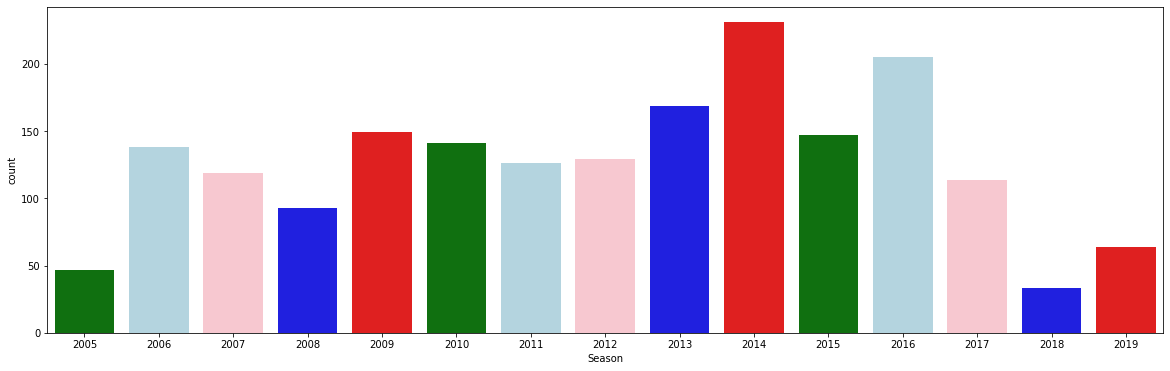

In [522]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,6))
sns.countplot(x='Season', data=match_merged, palette=['Green',"Lightblue",'Pink','Blue','Red'])
match_merged['Season'].value_counts().to_frame()

**Observation:** 2014 was the season with most number of matches in a season


### **2.) Most Number of wins in whole of teams having more than 10 wins**

Australia       209
India           201
South Africa    171
England         153
Sri Lanka       152
Name: Winner, dtype: int64

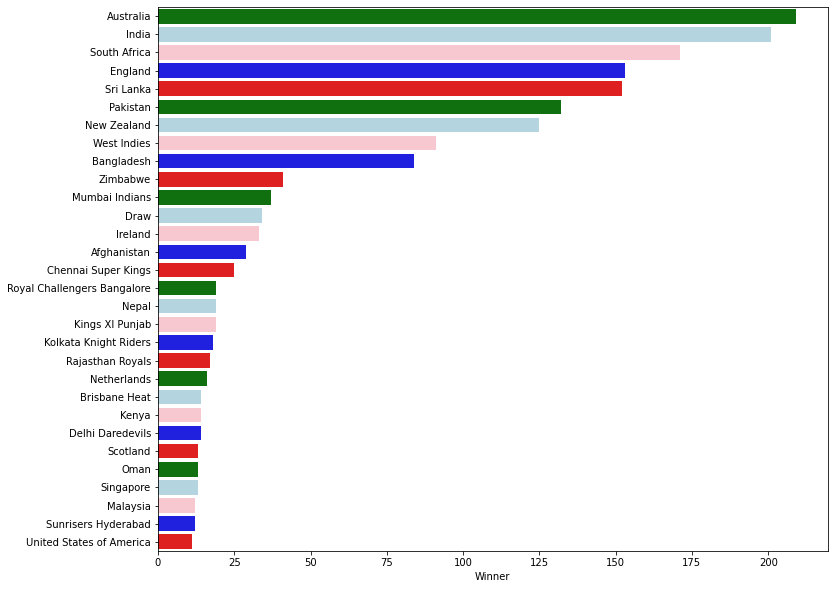

In [523]:
filtered_match=match_merged.groupby('Winner').filter(lambda x : len(x)>10)
plt.figure(figsize=(12,10))
data = filtered_match.Winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h',palette=['Green',"Lightblue",'Pink','Blue','Red'])
data.head()

**Observation:** Australia has the most number of wins


### **3.) Most Number of Player of match awards**

AB de Villiers    133
V Kohli            26
MS Dhoni           25
TM Dilshan         24
KC Sangakkara      20
Name: Player_of_match, dtype: int64

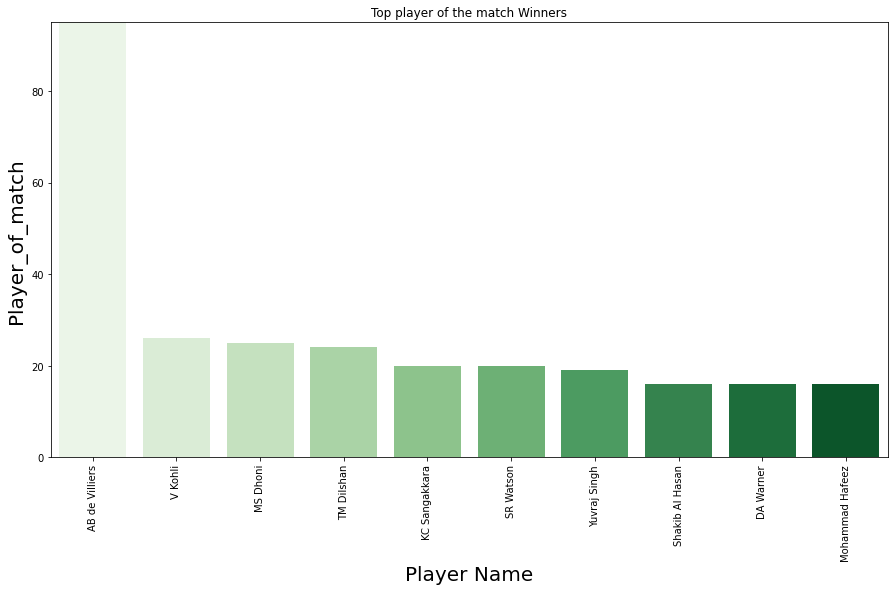

In [525]:
top_players = match_merged.Player_of_match.value_counts()[:10]
fig, ax = plt.subplots(figsize=(15,8))
ax.set_ylim([0,95])
ax.set_ylabel("Count").set_size(20)
ax.set_xlabel("Player Name").set_size(20)
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="Greens");
top_players.head()

**Observation:** "AB de villiers" has the most number of Player of match awards


### **4.) Count of number of matches at each venue having count more than 10**

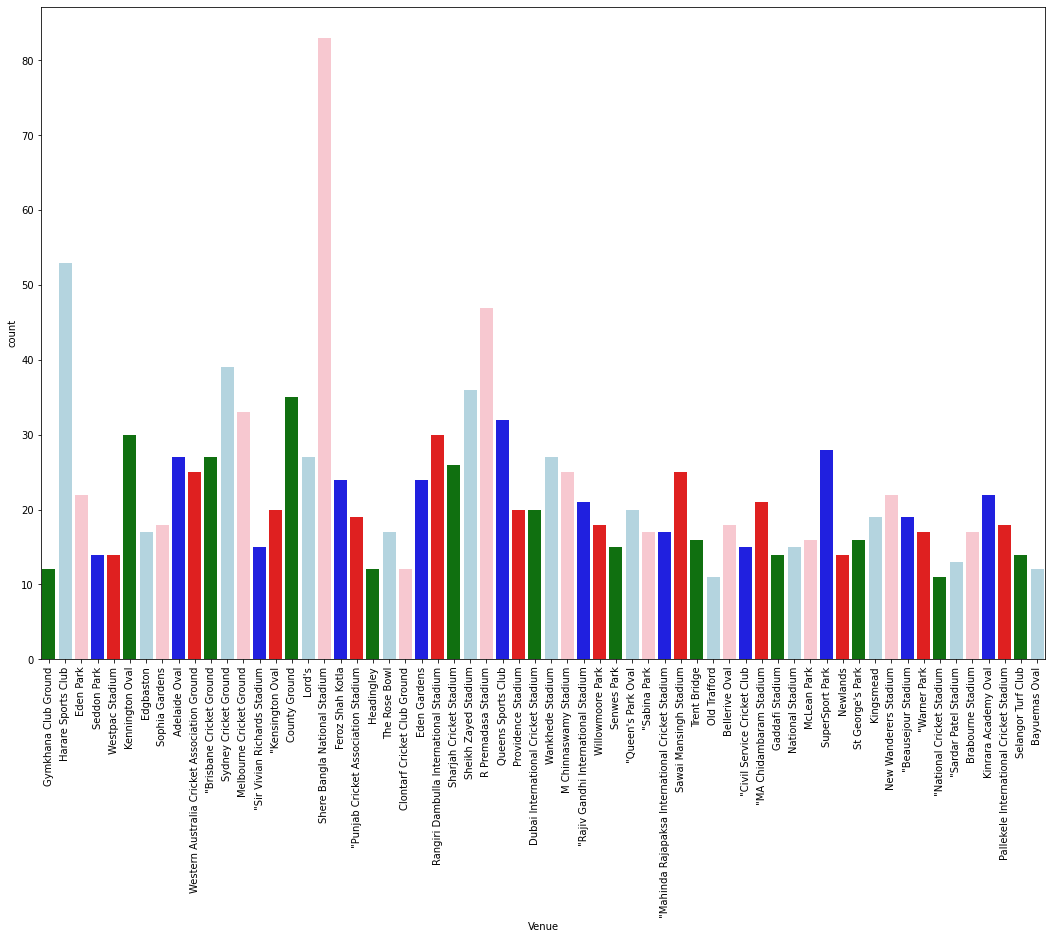

In [527]:
filtered_venue=match_merged.groupby('Venue').filter(lambda x : len(x)>10)
plt.figure(figsize=(18,12))
sns.countplot(x='Venue', data=filtered_venue,palette=['Green',"Lightblue",'Pink','Blue','Red'])
plt.xticks(rotation='vertical')
plt.show()

**Observation:** "Shere Bangla National Stadium" has hosted the most number of matches


### **5.) Toss decision Percentage**

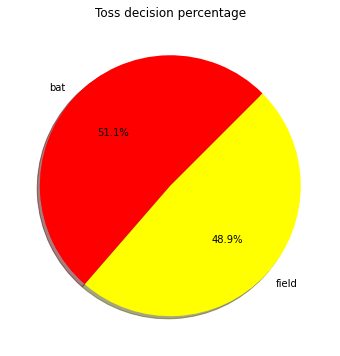

In [26]:
import numpy as np
plt.figure(figsize=(12,6))
temp_series = match_merged.Toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['red', 'yellow']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=45)
plt.title("Toss decision percentage")
plt.show()

**Observation:** Almost 51% of the toss decisions are made to bat first.

### **6.)Decision of toss over time**

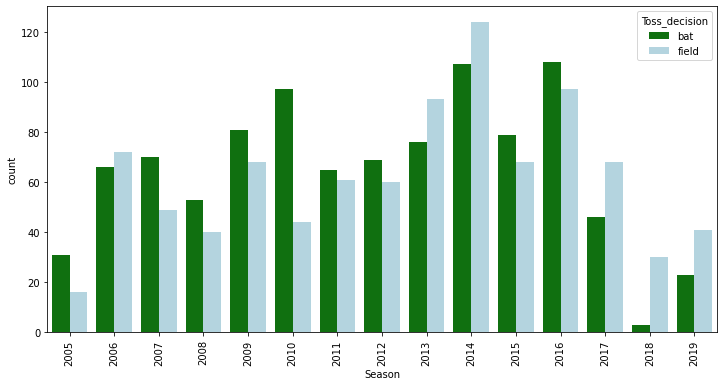

In [529]:
sorted_season=match_merged.sort_values(by='Season')
plt.figure(figsize=(12,6))
sns.countplot(x='Season', hue='Toss_decision', data=sorted_season,palette=['Green',"Lightblue"])
plt.xticks(rotation='vertical')
plt.show()

**Observation:** Initial year witnessed teams choosing bat first after winning the toss, but from 2017, positive ratio has shifted towards fielding and teams have started choosing fielding after winning the toss.

## **DATA MODELLING**

### **Prediction for Player-1**

In [34]:
from sklearn.preprocessing import LabelEncoder
P1 = match_merged[['Players_1','Players_2','Team1','Season','Venue']].copy()
var_mod = ['Team1','Venue','Season','Players_2']
l = LabelEncoder()
for i in var_mod:
    P1[i] = l.fit_transform(P1[i])
P1

,Players_1,Players_2,Team1,Season,Venue
0,Irfan Ahmed,428,42,11,210
1,Zeeshan Siddiqui,470,32,11,91
2,Irfan Ahmed,463,57,11,8
3,Nasir Shafiq,42,57,11,8
4,Noor Ali Zadran,451,73,11,93
...,...,...,...,...,...
1900,Zeeshan Siddiqui,470,28,11,5
1901,Amjad Ali,412,28,11,5
1902,Noor Ali Zadran,451,28,11,5
1903,Anwar Arudin,432,57,11,8


Taking players having count greater than 5

In [35]:
clean_P1=P1.groupby('Players_1').filter(lambda x : len(x)>5)

In [36]:
clean_P1['Players_1'].value_counts()

Tamim Iqbal    70
WU Tharanga    66
MJ Guptill     51
HM Amla        49
SR Watson      45
               ..
Imran Nazir     6
PW Gough        6
JD Ryder        6
PJ Moor         6
PG Raut         6
Name: Players_1, Length: 75, dtype: int64

In [37]:
clean_P1.shape

(1313, 5)

In [38]:
from sklearn.model_selection import train_test_split
Y=clean_P1.pop('Players_1')
X=clean_P1
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.21,random_state=2)

Decision Tree Algorithm-Player 1

In [40]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [41]:
y_pred = classifier.predict(X_test)

In [42]:
accuracy1=round(metrics.accuracy_score(y_test, y_pred)*100,0)
acc_list=[]
acc_list.append(accuracy1)
print("Accuracy of the model:", accuracy1)

Accuracy of the model: 57.0


Predicting Player 1 Who have played with V Kohli in match India in Wankhede Stadium Encoded Values for Input variables are:

1. Player 2(V Kohli)=227
2. India encoding: 27
3. 2019:14
4. wankhede 214  




In [45]:
classifier.predict([[227,27,14,214]])

array(['AM Rahane'], dtype=object)

**PLAYER 1= AM Rahane**

### **Prediction for Player-2**

In [90]:
from sklearn.preprocessing import LabelEncoder
P2 = match_merged[['Players_1','Players_2','Players_3','Team1','Season','Venue']].copy()
var2 = ['Team1','Venue','Season','Players_1','Players_3']
l = LabelEncoder()
for i in var2:
    P2[i] = l.fit_transform(P2[i])
P2

,Players_1,Players_2,Players_3,Team1,Season,Venue
0,137,Skhawat Ali,192,42,11,210
1,372,Zeeshan Maqsood,52,32,11,91
2,137,Waqas Barkat,338,57,11,8
3,264,Anwar Arudin,47,57,11,8
4,265,Usman Ghani,166,73,11,93
...,...,...,...,...,...,...
1900,372,Zeeshan Maqsood,52,28,11,5
1901,38,Salman Faris,239,28,11,5
1902,265,Usman Ghani,380,28,11,5
1903,41,Suhan Alagaratnam,47,57,11,8


In [91]:
clean_P2=P2.groupby('Players_2').filter(lambda y: len(y)>5)

In [92]:
clean_P2.shape

(1208, 6)

In [93]:
from sklearn.model_selection import train_test_split
Y=clean_P2.pop('Players_2')
X=clean_P2
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.21,random_state=3)

In [94]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [95]:
y_pred_2 = classifier.predict(X_test)

In [97]:
accuracy2=round(metrics.accuracy_score(y_test, y_pred_2)*100,0)
acc_list.append(accuracy2)
print("Accuracy of the model:", accuracy2)

Accuracy of the model: 52.0


For predicting Player 2, I have also used the value which was predicted in player 1.
Also, Predicting Player 2 Who have played with AM Rahane and KL Rahul in India in Wankhede Stadium in 2019 Encoded Values for Input variables are:

1. Player 1(AM Rahane)=23(Predicted Value)
2. Player 3(KL Rahul)=229 
3. India encoding: 27
4. 2019:14
5. wankhede 214  

In [101]:
classifier.predict([[23,229,27,14,214]])

array(['M Vijay'], dtype=object)

**PLAYER 2= M Vijay**

### **Prediction for Player-3**

In [108]:
from sklearn.preprocessing import LabelEncoder
P3 = match_merged[['Players_1','Players_2','Players_3','Players_4','Team1','Season','Venue']].copy()
var3 = ['Team1','Venue','Season','Players_1','Players_2','Players_4']
l = LabelEncoder()
for i in var3:
    P3[i] = l.fit_transform(P3[i])
P3

,Players_1,Players_2,Players_3,Players_4,Team1,Season,Venue
0,137,428,JJ Atkinson,286,42,11,210
1,372,470,Arif Hussain,410,32,11,91
2,137,463,Nizakat Khan,161,57,11,8
3,264,42,Ahmed Faiz Mohammad Noor,377,57,11,8
4,265,451,Hashmatullah Shahidi,281,73,11,93
...,...,...,...,...,...,...,...
1900,372,470,Arif Hussain,198,28,11,5
1901,38,412,Khurram Khan,360,28,11,5
1902,265,451,Rahmat Shah,375,28,11,5
1903,41,432,Ahmed Faiz Mohammad Noor,282,57,11,8


In [109]:
clean_P3=P3.groupby('Players_3').filter(lambda z: len(z)>5)
clean_P3.shape

(1131, 7)

In [110]:
from sklearn.model_selection import train_test_split
Y=clean_P3.pop('Players_3')
X=clean_P3
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.21,random_state=3)

In [111]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [112]:
y_pred_3 = classifier.predict(X_test)

In [115]:
accuracy3=round(metrics.accuracy_score(y_test, y_pred_3)*100,0)
acc_list.append(accuracy3)
print("Accuracy of the model:", accuracy3)

Accuracy of the model: 52.0


For predicting Player 3, I have also used the value which was predicted in player 1 and Player2.
Also, Predicting Player 2 Who have played with AM Rahane Murili Vijay, KL Rahul in India in Wankhede Stadium in 2019 Encoded Values for Input variables are:

1. Player 1(AM Rahane)=23(Predicted Value)
2. Player 2(M Vijay)=121(Predicted Value)
3. Player 4(KL Rahul)=229 
4. India encoding: 27
5. 2019:14
6. wankhede 214  

In [116]:
classifier.predict([[23,121,407,27,14,214]])

array(['AT Rayudu'], dtype=object)

**PLAYER 3= AT Rayudu**

### **Prediction for Player-4**

In [173]:
from sklearn.preprocessing import LabelEncoder
P4 = match_merged[['Players_1','Players_2','Players_3','Players_4','Players_5','Team1','Season','Venue']].copy()
var4 = ['Team1','Venue','Season','Players_1','Players_2','Players_3','Players_5']
l = LabelEncoder()
for i in var4:
    P4[i] = l.fit_transform(P4[i])
P4

,Players_1,Players_2,Players_3,Players_4,Players_5,Team1,Season,Venue
0,137,428,192,Nizakat Khan,64,42,11,210
1,372,470,52,VS Wategaonkar,235,32,11,91
2,137,463,338,JJ Atkinson,64,57,11,8
3,264,42,47,Shafiq Sharif,448,57,11,8
4,265,451,166,Nasir Jamal,430,73,11,93
...,...,...,...,...,...,...,...,...
1900,372,470,52,Khawar Ali,471,28,11,5
1901,38,412,239,SP Patil,440,28,11,5
1902,265,451,380,Samiullah Shenwari,175,28,11,5
1903,41,432,47,Nasir Shafiq,434,57,11,8


In [174]:
clean_P4=P4.groupby('Players_4').filter(lambda a: len(a)>5)
clean_P4.shape

(1246, 8)

In [175]:
from sklearn.model_selection import train_test_split
Y=clean_P4.pop('Players_4')
X=clean_P4
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.21,random_state=2)

In [176]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [177]:
y_pred_4 = classifier.predict(X_test)

In [179]:
accuracy4=round(metrics.accuracy_score(y_test, y_pred_4)*100,0)
acc_list.append(accuracy4)
print("Accuracy of the model:", accuracy4)

Accuracy of the model: 49.0


For predicting Player 4, I have also used the value which was predicted in player 1, Player2,Player3.
Also, Predicting Player 4 Who have played with AM Rahane Murili Vijay,AT Rayudu, KL Rahul in India in Wankhede Stadium in 2019 Encoded Values for Input variables are:

1. Player 1(AM Rahane)=23(Predicted Value)
2. Player 2(M Vijay)=121(Predicted Value)
3. Player 3(AT Rayudu)=42(Predicted Value)
4. Player 5(KL Rahul)=407 
5. India encoding: 27
6. 2019:14
7. wankhede 214  

In [187]:
classifier.predict([[23,121,42,407,27,14,214]])

array(['V Kohli'], dtype=object)

**PLAYER 4= V Kohli**

### **Prediction for Player-5**

In [237]:
from sklearn.preprocessing import LabelEncoder
P5 = match_merged[['Players_1','Players_2','Players_3','Players_4','Players_5','Players_6','Team1','Season','Venue']].copy()
var5 = ['Team1','Venue','Season','Players_1','Players_2','Players_3','Players_4','Players_6']
l = LabelEncoder()
for i in var5:
    P5[i] = l.fit_transform(P5[i])
P5

,Players_1,Players_2,Players_3,Players_4,Players_5,Players_6,Team1,Season,Venue
0,137,428,192,286,Babar Hayat,577,42,11,210
1,372,470,52,410,Khawar Ali,46,32,11,91
2,137,463,338,161,Babar Hayat,58,57,11,8
3,264,42,47,377,Suhan Alagaratnam,537,57,11,8
4,265,451,166,281,Samiullah Shenwari,362,73,11,93
...,...,...,...,...,...,...,...,...,...
1900,372,470,52,198,VS Wategaonkar,538,28,11,5
1901,38,412,239,360,Shaiman Anwar,291,28,11,5
1902,265,451,380,375,Hashmatullah Shahidi,362,28,11,5
1903,41,432,47,282,Shafiq Sharif,290,57,11,8


In [238]:
clean_P5=P5.groupby('Players_5').filter(lambda b: len(b)>5)
clean_P5.shape

(1165, 9)

In [239]:
from sklearn.model_selection import train_test_split
Y=clean_P5.pop('Players_5')
X=clean_P5
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.21,random_state=1)

In [240]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [241]:
y_pred_5 = classifier.predict(X_test)

In [243]:
accuracy5=round(metrics.accuracy_score(y_test, y_pred_5)*100,0)
acc_list.append(accuracy5)
print("Accuracy of the model:", accuracy5)

Accuracy of the model: 40.0


For predicting Player 5, I have also used the value which was predicted in player 1, Player2,Player3, Player4.
Also, Predicting Player 5 Who have played with AM Rahane Murili Vijay,AT Rayudu,V Kohli, KL Rahul in India in Wankhede Stadium in 2019 Encoded Values for Input variables are:

1. Player 1(AM Rahane)=23(Predicted Value)
2. Player 2(M Vijay)=121(Predicted Value)
3. Player 3(AT Rayudu)=42(Predicted Value)
4. Player 4(V Kohli)=406(Predicted Value)
5. Player 5(KL Rahul)=407 
6. India encoding: 27
7. 2019:14
8. wankhede 214  

In [246]:
classifier.predict([[23,121,42,406,407,27,14,214]])

array(['SK Raina'], dtype=object)

**PLAYER 5= SK Raina**

### **Prediction for Player-6**

In [247]:
from sklearn.preprocessing import LabelEncoder
P6 = match_merged[['Players_1','Players_2','Players_3','Players_4','Players_5','Players_6','Team1','Season','Venue']].copy()
var6 = ['Team1','Venue','Season','Players_1','Players_2','Players_3','Players_4','Players_5']
l = LabelEncoder()
for i in var6:
    P6[i] = l.fit_transform(P6[i])
P6

,Players_1,Players_2,Players_3,Players_4,Players_5,Players_6,Team1,Season,Venue
0,137,428,192,286,64,Waqas Barkat,42,11,210
1,372,470,52,410,235,Aamir Kaleem,32,11,91
2,137,463,338,161,64,Ankur Sharma,57,11,8
3,264,42,47,377,448,Suharril Fetri,57,11,8
4,265,451,166,281,430,Mohammad Nabi,73,11,93
...,...,...,...,...,...,...,...,...,...
1900,372,470,52,198,471,Sultan Ahmed,28,11,5
1901,38,412,239,360,440,Krishna Chandran,28,11,5
1902,265,451,380,375,175,Mohammad Nabi,28,11,5
1903,41,432,47,282,434,Khizar Hayat,57,11,8


In [248]:
clean_P6=P6.groupby('Players_6').filter(lambda b: len(b)>5)
clean_P6.shape

(977, 9)

In [249]:
from sklearn.model_selection import train_test_split
Y=clean_P6.pop('Players_6')
X=clean_P6
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.21,random_state=2)

In [250]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [251]:
y_pred_6 = classifier.predict(X_test)

In [253]:
accuracy6=round(metrics.accuracy_score(y_test, y_pred_6)*100,0)
acc_list.append(accuracy6)
print("Accuracy of the model:", accuracy6)

Accuracy of the model: 44.0


For predicting Player 6, I have also used the value which was predicted in player 1, Player2,Player3, Player4, Player5.
Also, Predicting Player 6 Who have played with AM Rahane, Murili Vijay,AT Rayudu,V Kohli,SK Raina in India in Wankhede Stadium in 2019 Encoded Values for Input variables are:

1. Player 1(AM Rahane)=23(Predicted Value)
2. Player 2(M Vijay)=121(Predicted Value)
3. Player 3(AT Rayudu)=42(Predicted Value)
4. Player 4(V Kohli)=406(Predicted Value)
5. Player 5(SK Raina)=408(Predicted Value) 
6. India encoding: 27
7. 2019:14
8. wankhede 214  

In [257]:
classifier.predict([[23,121,42,406,408,27,14,214]])

array(['RV Uthappa'], dtype=object)

**PLAYER 6= RV Uthappa**

### **Prediction for Player-7**

In [270]:
from sklearn.preprocessing import LabelEncoder
P7 = match_merged[['Players_1','Players_2','Players_3','Players_4','Players_5','Players_6','Players_7','Team1','Season','Venue']].copy()
var7 = ['Team1','Venue','Season','Players_1','Players_2','Players_3','Players_4','Players_5','Players_6']
l = LabelEncoder()
for i in var7:
    P7[i] = l.fit_transform(P7[i])
P7

,Players_1,Players_2,Players_3,Players_4,Players_5,Players_6,Players_7,Team1,Season,Venue
0,137,428,192,286,64,577,Ankur Sharma,42,11,210
1,372,470,52,410,235,46,Sultan Ahmed,32,11,91
2,137,463,338,161,64,58,JPR Lamsam,57,11,8
3,264,42,47,377,448,537,Hammadullah Khan,57,11,8
4,265,451,166,281,430,362,Shafiqullah,73,11,93
...,...,...,...,...,...,...,...,...,...,...
1900,372,470,52,198,471,538,Aamir Kaleem,28,11,5
1901,38,412,239,360,440,291,Mohammad Shahzad (2),28,11,5
1902,265,451,380,375,175,362,Shafiqullah,28,11,5
1903,41,432,47,282,434,290,Suharril Fetri,57,11,8


In [271]:
clean_P7=P7.groupby('Players_7').filter(lambda b: len(b)>5)
clean_P7.shape

(897, 10)

In [272]:
from sklearn.model_selection import train_test_split
Y=clean_P7.pop('Players_7')
X=clean_P7
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.22,random_state=3)


In [274]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)
y_pred_7 = classifier.predict(X_test)
accuracy7=round(metrics.accuracy_score(y_test, y_pred_7)*100,0)
acc_list.append(accuracy7)
print("Accuracy of the model:", accuracy7)

Accuracy of the model: 36.0


For predicting Player 7, I have also used the value which was predicted in player 1, Player2,Player3, Player4, Player5, Player 6.
Also, Predicting Player 7 Who have played with AM Rahane, Murili Vijay,AT Rayudu,V Kohli,SK Raina,RV Uthappa in India in Wankhede Stadium in 2019 Encoded Values for Input variables are:

1. Player 1(AM Rahane)=23(Predicted Value)
2. Player 2(M Vijay)=121(Predicted Value)
3. Player 3(AT Rayudu)=42(Predicted Value)
4. Player 4(V Kohli)=406(Predicted Value)
5. Player 5(SK Raina)=408(Predicted Value) 
6. Player 6(RV Uthappa)=400(Predicted Value) 
7. India encoding: 27
8. 2019:14
9. wankhede 214

In [280]:
classifier.predict([[23,121,42,406,408,400,27,14,214]])

array(['SR Patel'], dtype=object)

**PLAYER 7= SR Patel**

### **Prediction for Player-8**

In [323]:
from sklearn.preprocessing import LabelEncoder
P8 = match_merged[['Players_1','Players_2','Players_3','Players_4','Players_5','Players_6','Players_7','Players_8','Team1','Season','Venue']].copy()
var8 = ['Team1','Venue','Season','Players_1','Players_2','Players_3','Players_4','Players_5','Players_6','Players_7']
l = LabelEncoder()
for i in var8:
    P8[i] = l.fit_transform(P8[i])
P8

,Players_1,Players_2,Players_3,Players_4,Players_5,Players_6,Players_7,Players_8,Team1,Season,Venue
0,137,428,192,286,64,577,61,Haseeb Amjad,42,11,210
1,372,470,52,410,235,46,580,Amir Ali,32,11,91
2,137,463,338,161,64,58,269,Haseeb Amjad,57,11,8
3,264,42,47,377,448,537,214,Khizar Hayat,57,11,8
4,265,451,166,281,430,362,566,Mirwais Ashraf,73,11,93
...,...,...,...,...,...,...,...,...,...,...,...
1900,372,470,52,198,471,538,47,Amir Ali,28,11,5
1901,38,412,239,360,440,291,399,Fayyaz Ahmed,28,11,5
1902,265,451,380,375,175,362,566,Shapoor Zadran,28,11,5
1903,41,432,47,282,434,290,579,Muhammad Wafiq,57,11,8


In [324]:
clean_P8=P8.groupby('Players_8').filter(lambda b: len(b)>5)
clean_P8.shape

(931, 11)

In [325]:
from sklearn.model_selection import train_test_split
Y=clean_P8.pop('Players_8')
X=clean_P8
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.15,random_state=2)


In [326]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)
y_pred_8 = classifier.predict(X_test)

In [328]:
accuracy8=round(metrics.accuracy_score(y_test, y_pred_8)*100,0)
acc_list.append(accuracy8)
print("Accuracy of the model:", accuracy8)

Accuracy of the model: 33.0


For predicting Player 8, I have also used the value which was predicted in player 1, Player2,Player3, Player4, Player5,Player6,Player7.
Also, Predicting Player 8 Who have played with AM Rahane, Murili Vijay,AT Rayudu,V Kohli,SK Raina,RV Uthappa, SR Patel in India in Wankhede Stadium in 2019 Encoded Values for Input variables are:

1. Player 1(AM Rahane)=23(Predicted Value)
2. Player 2(M Vijay)=121(Predicted Value)
3. Player 3(AT Rayudu)=42(Predicted Value)
4. Player 4(V Kohli)=406(Predicted Value)
5. Player 5(SK Raina)=408(Predicted Value) 
6. Player 6(RV Uthappa)=400(Predicted Value)
7. Player 7(SR Patel)=543(Predicted Value) 
7. India encoding: 27
8. 2019:14
9. wankhede 214

In [334]:
classifier.predict([[23,121,42,406,408,400,543,27,14,214]])

array(['Mashrafe Mortaza'], dtype=object)

**PLAYER 8= Mashrafe Mortaza**

### **Prediction for Player-9**

In [382]:
from sklearn.preprocessing import LabelEncoder
P9 = match_merged[['Players_1','Players_2','Players_3','Players_4','Players_5','Players_6','Players_7','Players_8','Players_9','Team1','Season','Venue']].copy()
var9 = ['Team1','Venue','Season','Players_1','Players_2','Players_3','Players_4','Players_5','Players_6','Players_7','Players_8']
l = LabelEncoder()
for i in var9:
    P9[i] = l.fit_transform(P9[i])
P9

,Players_1,Players_2,Players_3,Players_4,Players_5,Players_6,Players_7,Players_8,Players_9,Team1,Season,Venue
0,137,428,192,286,64,577,61,208,Tanwir Afzal,42,11,210
1,372,470,52,410,235,46,580,66,AV Lalcheta,32,11,91
2,137,463,338,161,64,58,269,208,Tanwir Afzal,57,11,8
3,264,42,47,377,448,537,214,311,Hassan Ghulam,57,11,8
4,265,451,166,281,430,362,566,383,Dawlat Zadran,73,11,93
...,...,...,...,...,...,...,...,...,...,...,...,...
1900,372,470,52,198,471,538,47,66,M Ansari,28,11,5
1901,38,412,239,360,440,291,399,172,Mohammad Naveed,28,11,5
1902,265,451,380,375,175,362,566,570,Dawlat Zadran,28,11,5
1903,41,432,47,282,434,290,579,400,Shahrulnizam Yusof,57,11,8


In [383]:
clean_P9=P9.groupby('Players_9').filter(lambda b: len(b)>10)
clean_P9.shape

(561, 12)

In [384]:
from sklearn.model_selection import train_test_split
Y=clean_P9.pop('Players_9')
X=clean_P9
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.21,random_state=3)

In [385]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)
y_pred_9 = classifier.predict(X_test)

In [387]:
accuracy9=round(metrics.accuracy_score(y_test, y_pred_9)*100,0)
acc_list.append(accuracy9)
print("Accuracy of the model:", accuracy9)

Accuracy of the model: 35.0


For predicting Player 9, I have also used the value which was predicted in player 1, Player2,Player3, Player4, Player5,Player6,Player7,Player8.
Also, Predicting Player 9 Who have played with AM Rahane, Murili Vijay,AT Rayudu,V Kohli,SK Raina,RV Uthappa, SR Patel,Mashrafe Murtaza in India in Wankhede Stadium in 2019 Encoded Values for Input variables are:

1. Player 1(AM Rahane)=23(Predicted Value)
2. Player 2(M Vijay)=121(Predicted Value)
3. Player 3(AT Rayudu)=42(Predicted Value)
4. Player 4(V Kohli)=406(Predicted Value)
5. Player 5(SK Raina)=408(Predicted Value) 
6. Player 6(RV Uthappa)=400(Predicted Value)
7. Player 7(SR Patel)=543(Predicted Value)
7. Player 8(Mashrafe Mortaza)=380(Predicted Value) 
9. India encoding: 27
10. 2019:14
11. Wankhede 214

In [393]:
classifier.predict([[23,121,42,406,408,400,543,380,27,14,214]])

array(['B Kumar'], dtype=object)

**PLAYER 9= B Kumar**

### **Prediction for Player-10**

In [400]:
from sklearn.preprocessing import LabelEncoder
P10 = match_merged[['Players_1','Players_2','Players_3','Players_4','Players_5','Players_6','Players_7','Players_8','Players_9','Players_10','Team1','Season','Venue']].copy()
var10 = ['Team1','Venue','Season','Players_1','Players_2','Players_3','Players_4','Players_5','Players_6','Players_7','Players_8','Players_9']
l = LabelEncoder()
for i in var10:
    P10[i] = l.fit_transform(P10[i])
P10

,Players_1,Players_2,Players_3,Players_4,Players_5,Players_6,Players_7,Players_8,Players_9,Players_10,Team1,Season,Venue
0,137,428,192,286,64,577,61,208,568,Nadeem Ahmed,42,11,210
1,372,470,52,410,235,46,580,66,50,RJ Ranpura,32,11,91
2,137,463,338,161,64,58,269,208,568,Nadeem Ahmed,57,11,8
3,264,42,47,377,448,537,214,311,211,Shahrulnizam Yusof,57,11,8
4,265,451,166,281,430,362,566,383,159,Amir Hamza,73,11,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,372,470,52,198,471,538,47,66,325,RJ Ranpura,28,11,5
1901,38,412,239,360,440,291,399,172,374,Kamran Shazad,28,11,5
1902,265,451,380,375,175,362,566,570,159,Mirwais Ashraf,28,11,5
1903,41,432,47,282,434,290,579,400,533,Hassan Ghulam,57,11,8


In [401]:
clean_P10=P10.groupby('Players_10').filter(lambda b: len(b)>10)
clean_P10.shape

(624, 13)

In [402]:
from sklearn.model_selection import train_test_split
Y=clean_P10.pop('Players_10')
X=clean_P10
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.21,random_state=2)

In [403]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)
y_pred_10 = classifier.predict(X_test)

In [405]:
accuracy10=round(metrics.accuracy_score(y_test, y_pred_10)*100,0)
acc_list.append(accuracy10)
print("Accuracy of the model:", accuracy10)

Accuracy of the model: 33.0


For predicting Player 10, I have also used the value which was predicted in player 1, Player2,Player3, Player4, Player5,Player6,Player7,Player8,Player9.
Also, Predicting Player 10 Who have played with AM Rahane, Murili Vijay,AT Rayudu,V Kohli,SK Raina,RV Uthappa, SR Patel,Mashrafe Murtaza,B Kumar in India in Wankhede Stadium in 2019 Encoded Values for Input variables are:

1. Player 1(AM Rahane)=23(Predicted Value)
2. Player 2(M Vijay)=121(Predicted Value)
3. Player 3(AT Rayudu)=42(Predicted Value)
4. Player 4(V Kohli)=406(Predicted Value)
5. Player 5(SK Raina)=408(Predicted Value) 
6. Player 6(RV Uthappa)=400(Predicted Value)
7. Player 7(SR Patel)=543(Predicted Value)
8. Player 8(Mashrafe Mortaza)=380(Predicted Value) 
9. Player 9(B Kumar)=276(Predicted Value) 
10. India encoding: 27
11. 2019:14
12. Wankhede 214

In [410]:
classifier.predict([[23,121,42,406,408,400,543,380,276,27,14,214]])

array(['Harbhajan Singh'], dtype=object)

**PLAYER 10= Harbhajan Singh**

### **Prediction for Player-11**

In [482]:
from sklearn.preprocessing import LabelEncoder
P11 = match_merged[['Players_1','Players_2','Players_3','Players_4','Players_5','Players_6','Players_7','Players_8','Players_9','Players_10','Players_12','Team1','Season','Venue']].copy()
var11 = ['Team1','Venue','Season','Players_1','Players_2','Players_3','Players_4','Players_5','Players_6','Players_7','Players_8','Players_9','Players_10']
l = LabelEncoder()
for i in var11:
    P11[i] = l.fit_transform(P11[i])
P11

,Players_1,Players_2,Players_3,Players_4,Players_5,Players_6,Players_7,Players_8,Players_9,Players_10,Players_12,Team1,Season,Venue
0,137,428,192,286,64,577,61,208,568,387,Amjad Ali,42,11,210
1,372,470,52,410,235,46,580,66,50,438,Noor Ali Zadran,32,11,91
2,137,463,338,161,64,58,269,208,568,387,SP Khakurel,57,11,8
3,264,42,47,377,448,537,214,311,211,512,Amjad Ali,57,11,8
4,265,451,166,281,430,362,566,383,159,68,SP Khakurel,73,11,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,372,470,52,198,471,538,47,66,325,438,Anwar Arudin,28,11,5
1901,38,412,239,360,440,291,399,172,374,287,SP Khakurel,28,11,5
1902,265,451,380,375,175,362,566,570,159,352,Amjad Ali,28,11,5
1903,41,432,47,282,434,290,579,400,533,208,SP Khakurel,57,11,8


In [483]:
clean_P11=P11.groupby('Players_12').filter(lambda b: len(b)>12)
clean_P11.shape

(935, 14)

In [484]:
from sklearn.model_selection import train_test_split
Y=clean_P11.pop('Players_12')
X=clean_P11
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=2)

In [485]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)
y_pred_11 = classifier.predict(X_test)

In [487]:
accuracy11=round(metrics.accuracy_score(y_test, y_pred_11)*100,0)
acc_list.append(accuracy11)
print("Accuracy of the model:", accuracy11)

Accuracy of the model: 16.0


For predicting Player 11, I have also used the value which was predicted in player 1, Player2,Player3, Player4, Player5,Player6,Player7,Player8,Player9,Player10.
Also, Predicting Player 11 Who have played with AM Rahane, Murili Vijay,AT Rayudu,V Kohli,SK Raina,RV Uthappa, SR Patel,Mashrafe Murtaza,B Kumar,Harbhajan Singh in India in Wankhede Stadium in 2019 Encoded Values for Input variables are:

1. Player 1(AM Rahane)=23(Predicted Value)
2. Player 2(M Vijay)=121(Predicted Value)
3. Player 3(AT Rayudu)=42(Predicted Value)
4. Player 4(V Kohli)=406(Predicted Value)
5. Player 5(SK Raina)=408(Predicted Value) 
6. Player 6(RV Uthappa)=400(Predicted Value)
7. Player 7(SR Patel)=543(Predicted Value)
8. Player 8(Mashrafe Mortaza)=380(Predicted Value) 
9. Player 9(B Kumar)=276(Predicted Value) 
10. Player 10(Harbhajan Singh)=392(Predicted Value) 
11. India encoding: 27
12. 2019:14
13. Wankhede 214

In [503]:
classifier.predict([[23,121,42,406,408,400,543,380,276,392,27,14,214]])

array(['HM Amla'], dtype=object)

**PLAYER 11= HM Amla**

## **Predicted Team 11**

In [509]:
# Storing all the predicted names into a dataframe. 
import pandas as pd
Team11= {'Name': ['AM Rahane', 'Murili Vijay','AT Rayudu','V Kohli','SK Raina','RV Uthappa','SR Patel','Mashrafe Murtaza','B Kumar','Harbhajan Singh','HM Amla'], 'Accuracy': acc_list}
Team= pd.DataFrame(Team11)  
Team

,Name,Accuracy
0,AM Rahane,57.0
1,Murili Vijay,52.0
2,AT Rayudu,52.0
3,V Kohli,49.0
4,SK Raina,40.0
5,RV Uthappa,44.0
6,SR Patel,36.0
7,Mashrafe Murtaza,33.0
8,B Kumar,35.0
9,Harbhajan Singh,33.0


In [513]:
print("Average accuracy of the Predicted Team is: ",round(sum(acc_list)/11,0),'%')

Average accuracy of the Predicted Team is:  41.0 %


In [505]:
# THIS CODE IS A ROUGH CODE FOR CHECKING THE ENCODED VALUE OF EVERY PREDICTED NAME OF THE PLAYER IN ORDER TO USE THEM FOR OTHER PREDICTIONS


# from sklearn import preprocessing
# from sklearn.preprocessing import LabelEncoder
# extra = match_merged[['Players_10','Players_3','Team1','Season','Venue']].copy()
# label_encoder = preprocessing.LabelEncoder()
# extra['Team_1_encode']= label_encoder.fit_transform(extra['Team1'])
# extra['Players_4_encode']= label_encoder.fit_transform(extra['Players_10'])
# extra['Season_en']= label_encoder.fit_transform(extra['Season'])
# extra['Venue_en']= label_encoder.fit_transform(extra['Venue'])
# extra.head()

In [504]:
# extra[extra['Players_10']=='Harbhajan Singh']